<a href="https://colab.research.google.com/github/Drag-3/CanCodepyFinal/blob/main/FinalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# Want to find serveral things
"""
What sized dogs where the most adopted in 2020 (status adopted, status changed in 2020), what breed, what gender
Which has the strongest correlation? 
Does age have a stronger factor on adoption? Breed? Size? Gender?

If you were a breeder, what breeds would be the best to focus on for the best return (age is less of a foctor for this question)
"""
df = pd.read_csv("https://raw.githubusercontent.com/Drag-3/CanCodepyFinal/main/pet-adoption.csv")
df

df2 = pd.read_csv("https://raw.githubusercontent.com/Drag-3/CanCodepyFinal/main/Louisville_ad.csv")
df2

,kennel,animalid,jurisdiction,intype,insubtype,indate,surreason,outtype,outsubtype,outdate,animaltype,sex,bites,petsize,color,breed,sourcezipcode,ObjectId
0,C122,A676188,40272,STRAY,OTC,2020/01/18 00:00:00,STRAY,TRANSFER,RESCUE GRP,2020/01/23 00:00:00,CAT,M,N,MED,BLACK,DOMESTIC SH,40272,1
1,N04,A698094,40208,STRAY,OTC,2021/08/20 00:00:00,STRAY,ADOPTION,WALK IN,2021/08/29 00:00:00,DOG,N,N,LARGE,TRICOLOR,BEAGLE / CATAHOULA,40208,2
2,CW07,A686832,40205,FOSTER,RETURN,2021/01/13 00:00:00,FOSTER RET,ADOPTION,INTERNET,2021/01/14 00:00:00,CAT,S,N,MED,WHITE / BRN TABBY,DOMESTIC SH,40205,3
3,NP,A725451,40059,FOSTER,RETURN,2022/11/18 00:00:00,FOSTER RET,ADOPTION,FOSTER,2022/11/18 00:00:00,DOG,N,N,MED,BR BRINDLE,PIT BULL,40059,4
4,N39,A683502,40219,FOSTER,RETURN,2020/09/14 00:00:00,FOSTER RET,ADOPTION,WALK IN,2020/09/16 00:00:00,CAT,N,N,KITTN,BRN TABBY,DOMESTIC SH,40205,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46659,ACO UNIT,A698544,40216,STRAY,FIELD,2021/08/24 00:00:00,STRAY,RTO,IN FIELD,2021/08/24 00:00:00,DOG,F,N,LARGE,TAN,PIT BULL,40218,46660
46660,TNR/SNR,A693710,40272,STRAY,FIELD,2021/06/14 00:00:00,STRAY,SNR,NaN,2021/06/17 00:00:00,CAT,N,N,SMALL,ORANGE / WHITE,DOMESTIC SH,40218,46661
46661,K106,A700290,40214,CONFISCATE,POLICE,2021/09/10 00:00:00,UNKNOWN,RTO,IN KENNEL,2021/09/11 00:00:00,DOG,N,N,SMALL,WHITE / TAN,CHIHUAHUA SH,40218,46662
46662,N31,A702140,40216,CONFISCATE,POLICE,2021/10/01 00:00:00,UNKNOWN,ADOPTION,WALK IN,2021/10/20 00:00:00,DOG,N,N,MED,BLACK / WHITE,PIT BULL,40218,46663


In [ ]:
# Sanitize the dataset

df = df[["organization_id", "breeds", "colors", "age", "gender", "size", "status", "status_changed_at"]]
# Only interested in these rows

def s_id(org_id: str):
  return org_id[:2]

def get_breeds(breed: str):
  out = breed
  out = out.translate({ord(i): None for i in "{}'"})
  sections = out.split(",")
  out = []
  for sect in sections:
    titlespl = sect.split(":")
    breed = titlespl[1]
    if breed == "None":
      out.append("")
    else:
      out.append(breed)
    
  return (out[0], out[2])

def get_color(colors: str):
  out = colors
  out = out.translate({ord(i): None for i in "{}'"})
  return out.split(",")[0].split(":")[1].strip()

def get_year(timestamp: str):
  return timestamp.split("-")[0]
sdf = pd.DataFrame({"org_id": df['organization_id'].apply(s_id)})

primary, mixed = [], []
for breed in df["breeds"]:
  p, m = get_breeds(breed)
  primary.append(p)
  mixed.append(m)

sdf = sdf.assign(breed=primary, mixed=mixed)

colors = []
for color in df["colors"]:
  colors.append(get_color(color))

sdf = sdf.assign(color=colors)

times = []
for year in df["status_changed_at"]:
  times.append(get_year(year))

sdf = sdf.assign(yearChanged=times)

sdf = sdf.assign(age=df['age'], gender=df["gender"], size=df["size"], status=df["status"])
sdf.groupby("status")["yearChanged"].value_counts()
sdf["breed"].value_counts()

 Labrador Retriever            68
 Terrier                       57
 Mixed Breed                   55
 Pit Bull Terrier              53
 Chihuahua                     46
                               ..
 Havanese                       1
 Italian Greyhound              1
 Akita                          1
 German Shorthaired Pointer     1
 Greyhound                      1
Name: breed, Length: 90, dtype: int64

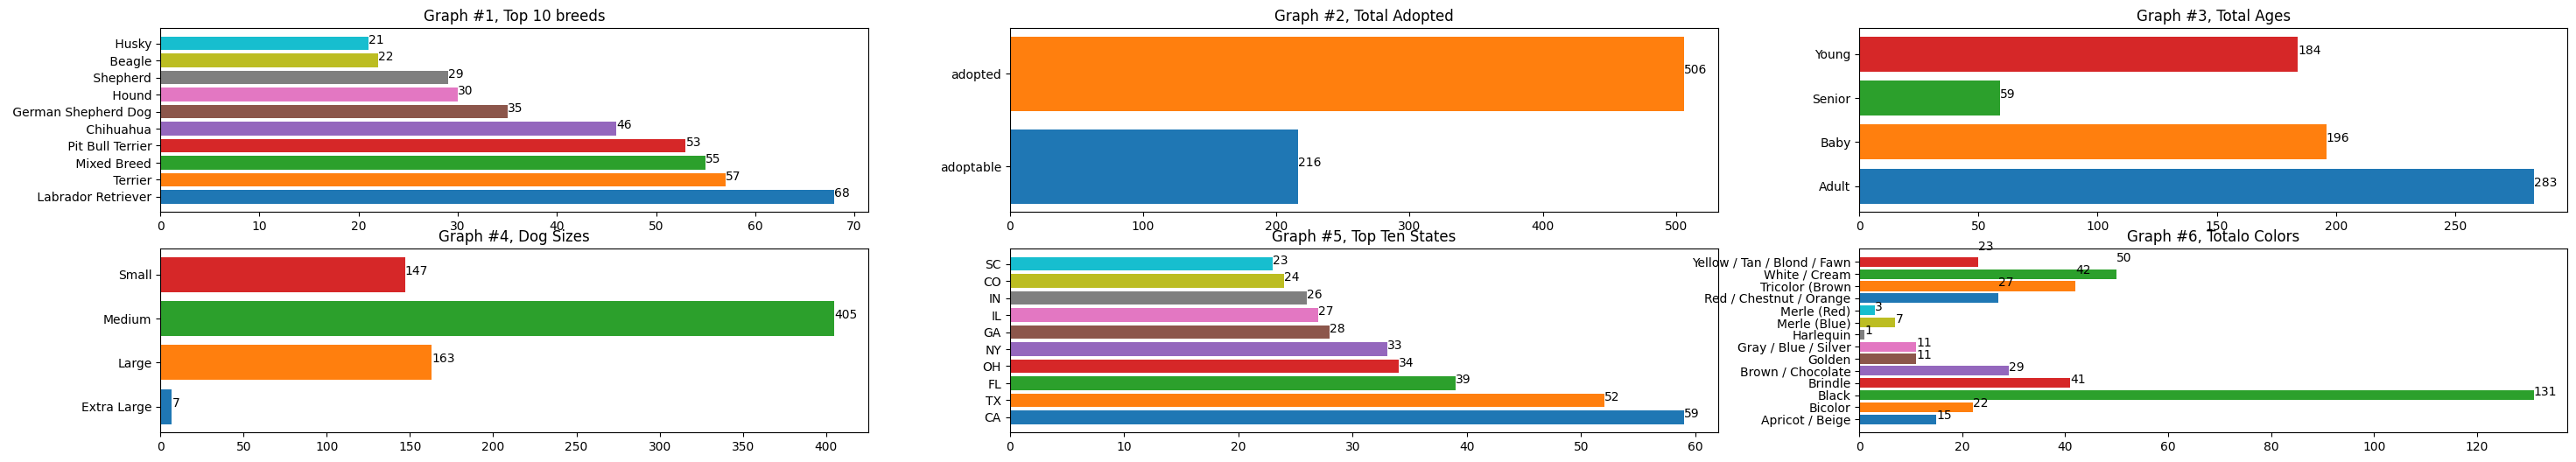

In [ ]:
#Plot totals of Breeds
#Plot Total Adopted / Unadopted
#Plot Ages
#colors
#sizes
# States

fig, axs = plt.subplots(2, 3, figsize=(20, 6))

total_breeds = sdf.groupby('breed').size().nlargest(10)
total_adopted = sdf.groupby("status")['status'].size()
total_ages = sdf.groupby('age').size()


for idx, (k, v) in enumerate(total_breeds.items()):
  axs[0][0].barh(k, v)
  axs[0][0].text(v, idx, f'{v}')

for idx, (k, v) in enumerate(total_adopted.items()):
  axs[0][1].barh(k, v)
  axs[0][1].text(v, idx, f'{v}')

for idx, (k, v) in enumerate(total_ages.items()):
  axs[0][2].barh(k, v)
  axs[0][2].text(v, idx, f'{v}')

axs[0][0].set_title("Graph #1, Top 10 breeds")
axs[0][1].set_title("Graph #2, Total Adopted")
axs[0][2].set_title("Graph #3, Total Ages")

total_sizes = sdf.groupby('size').size()
total_colors = sdf.groupby('color').size()
total_states = sdf.groupby('org_id').size().nlargest(10)

for idx, (k, v) in enumerate(total_sizes.items()):
  axs[1][0].barh(k, v)
  axs[1][0].text(v, idx, f'{v}')

for idx, (k, v) in enumerate(total_states.items()):
  axs[1][1].barh(k, v)
  axs[1][1].text(v, idx, f'{v}')

for idx, (k, v) in enumerate(total_colors.items()):
  if k == 'None':  # Skip dogs whose color was not entered into the system
    continue
  axs[1][2].barh(k, v)
  axs[1][2].text(v, idx, f'{v}')

axs[1][0].set_title("Graph #4, Dog Sizes")
axs[1][1].set_title("Graph #5, Top Ten States")
axs[1][2].set_title("Graph #6, Totalo Colors")

fig.subplots_adjust(right=1.5)
plt.show()

# Initial Analysis
**All of these graphs are on all dogs taht were in the contribututed shelters in 2020, whether they were adopted or unadopted at the time of capture.**

---
Results # 1
*   The most populat breed in shelters were **Labrador Retrievers**
*   Most dogs that were in shelters where **Adults**
*   Most dogs were **Medium sized**
*   **California** had the most dogs in the Shelters
*   The most popular color was **black**
---
There are no obvious outliers...

However not all dogs have a color entered, which makes color potentially a bad, option to use for analysis

The dataset has 722 entries, but I do wish there was more

I want to change the dataset used to one with more datapoints


In [17]:
# Sanitize DS2

df2
# Select only the necessary columns and filter out unnecessary columns
df2f = df2[['intype', 'insubtype', 'indate', 'surreason',\
            'outtype', 'outsubtype', 'outdate', 'animaltype',\
            'sex', 'bites', 'petsize', 'color', 'breed']]

#Remove Entries that animal is not dog or cat
#These are negliable, so we will not deal with them in our work
dc = ("DOG", "CAT")
df2f = df2f[df2f['animaltype'].isin(dc)]

# Convert date columns to datetime format
in_dates = df2f['indate']
out_dates = df2f['outdate']
df2f['indate'] = pd.to_datetime(in_dates)
df2f['outdate'] = pd.to_datetime(out_dates)

# Define values to drop from intype and outtype columns
DROP_VALUES = ["DISPOSAL", "FOR TRANSP", "EVACUEE", "DIED", "TNR", "DISPOSAL",
               "DISPOSAL", "TRANSPORT", "TRANSFER", "SNR", "RELEASE", "SNR",
               "FOUND", "DEAD"]

# Remove rows with values in DROP_VALUES from intype and outtype columns
df2f = df2f[~df2f['intype'].isin(DROP_VALUES)]
df2f = df2f[~df2f['outtype'].isin(DROP_VALUES)]

# Define function to get the season from a date
def get_season(date):
    year = date.year
    try:
      seasons = {'winter':(pd.to_datetime(f'{year}-01-01'), pd.to_datetime(f'{year}-03-20')),
                'spring':(pd.to_datetime(f'{year}-03-21'), pd.to_datetime(f'{year}-06-20')),
                'summer':(pd.to_datetime(f'{year}-06-21'), pd.to_datetime(f'{year}-09-22')),
                'fall':(pd.to_datetime(f'{year}-09-23'), pd.to_datetime(f'{year}-12-20')),
                'winter':(pd.to_datetime(f'{year}-12-21'), pd.to_datetime(f'{year}-12-31'))}
      # Check which season the date falls under
      for season, (start, end) in seasons.items():
          if start <= date <= end:
              return season
    except:
      pass
    return None

# Add a column for the season in which the animal was taken in and released
df2f['inseason'] = df2f['indate'].apply(get_season)
df2f['outseason'] = df2f['outdate'].apply(get_season)

df2f

,intype,insubtype,indate,surreason,outtype,outsubtype,outdate,animaltype,sex,bites,petsize,color,breed,inseason,outseason
1,STRAY,OTC,2021-08-20,STRAY,ADOPTION,WALK IN,2021-08-29,DOG,N,N,LARGE,TRICOLOR,BEAGLE / CATAHOULA,summer,summer
2,FOSTER,RETURN,2021-01-13,FOSTER RET,ADOPTION,INTERNET,2021-01-14,CAT,S,N,MED,WHITE / BRN TABBY,DOMESTIC SH,None,None
3,FOSTER,RETURN,2022-11-18,FOSTER RET,ADOPTION,FOSTER,2022-11-18,DOG,N,N,MED,BR BRINDLE,PIT BULL,fall,fall
4,FOSTER,RETURN,2020-09-14,FOSTER RET,ADOPTION,WALK IN,2020-09-16,CAT,N,N,KITTN,BRN TABBY,DOMESTIC SH,summer,summer
5,FOSTER,RETURN,2021-06-09,STRAY,ADOPTION,FACEBOOK,2021-06-17,CAT,N,N,KITTN,GRAY,DOMESTIC SH,spring,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46658,STRAY,FIELD,2021-08-24,STRAY,RTO,IN FIELD,2021-08-24,DOG,M,N,LARGE,BLACK,PIT BULL,summer,summer
46659,STRAY,FIELD,2021-08-24,STRAY,RTO,IN FIELD,2021-08-24,DOG,F,N,LARGE,TAN,PIT BULL,summer,summer
46661,CONFISCATE,POLICE,2021-09-10,UNKNOWN,RTO,IN KENNEL,2021-09-11,DOG,N,N,SMALL,WHITE / TAN,CHIHUAHUA SH,summer,summer
46662,CONFISCATE,POLICE,2021-10-01,UNKNOWN,ADOPTION,WALK IN,2021-10-20,DOG,N,N,MED,BLACK / WHITE,PIT BULL,fall,fall


# Key
## From Site

Animal Services Provides for the care and control of animals in the Louisville Metro area, including pet licensing and pet adoption.
# Data
## Dictionary:
### kennel- Location of where the animal is being housed.
### animal id- Unique identifying number assigned to each specific animal
### jurisdiction- The zip code the animal was picked up from.
### intake type/intake subtype- The reason why the animal was impounded at MAS.
*   CONFISCATE The animal was impounded due to a violation of Louisville Metro Ordinance or Kentucky Revised Statutes
*   ABANDONED Animal was impounded because of a violation of the Abandonment ordinance
*   BITE Animal was impounded due to biting someone
*   CHAINING Animal was impounded for a chaining violation
*   COURT ORD Animal was impounded as a result of a court order
*   CRUELTY Animal was impounded for a violation of the Cruelty ordinance or statute
*   DANGER DOG Animal was impounded because of a violation of the Dangerous Dog/Potentially Dangerous Dog ordinance
*   EVICTION Animal was impounded during an eviction
*   HOSPITAL Animal was impounded due to the owner being in the hospital
*   NEGLECT Animal was impounded for a violation of the Provision of Necessities ordinance
*   OWNER DIED Animal was impounded because their owner died
*   POLICE Animal was impounded by the police
*   POTDANGER Animal was impounded because of a violation of the Dangerous Dog/Potentially Dangerous Dog ordinance
*   RESTRAINT Animal impounded by an animal control officer for restraint violation
*   UNPERMITED Animal was impounded by an animal control officer for not being licensed or permitted
*   DISPOSAL The animal was brought to the shelter deceased to be properly disposed
  *   FIELD An animal control officer picks up a deceased animal while outside the shelter.
  *   OWNER A owner turns in their deceased animal
  *   STRAY A deceased unowned animal is brought in to MAS by a citizen.
  *   VET CLINIC The animal was brought to the shelter deceased to be properly disposed by a vet clinic.
  *   WILDLIFE A citizen turning in a deceased wild animal.
*   EVACUEE The animal was impounded due to the owner being evacuated due to a natural disaster
  *   FIELD The animal was impounded outside of the shelter due to the owner being evacuated due to a natural disaster
  *   OTC The animal was impounded at the shelter due to the owner being evacuated due to a natural disaster
*   FOR TRANSP This category was used when MAS impounded an animal from a rescue or other shelter to be transported by MAS to another rescue
  *   K HUMANE S MAS impounded an animal from Kentucky Humane Society to be transported by MAS to another rescue
  *   RESCUE GRP MAS impounded an animal from a rescue group to be transported by MAS to another rescue
*   FOSTER When a foster returns an animal to MAS to go up for adoption
*   RETURN When a foster returns an animal to MAS to go up for adoption
*   FOUND When a citizen reports finding a dog.
  *   WEB Category used when a citizen reports an animal lost or found on the website
  *   LOST When a citizen reports their dog missing.
  *   WEB Category used when a citizen reports an animal lost or found on the website
*   OWNER SUR The animal was impounded due to the owner signing over their rights to MAS.
  *   EUTH REQ Animal was surrendered to be euthanized.
  *   FIELD Animal was surrendered by its owner to an officer while the officer was outside of the shelter
  *   OTC Animal was surrendered by its owner to MAS
*   RETURN 30 Animal is surrendered by an adopter before owning it 30 days
*   RETURN The animal was impounded due to being returned by the adopter
*   ADOPTION The animal was impounded due to being returned by the adopter
*   K HUMANE S The animal was impounded due to being returned by Kentucky Humane Society
*   STRAY The animal was impounded for being a stray either in the field or at the shelter.
*   FIELD Animal was impounded in the field usually by an animal control officer
*   OTC Animal was impounded at Metro Animal Services usually being turned in by a citizen
### intake date - Date the animal was impounded
### surreason - The reason why the animal was surrendered
*   ABANDON The animal was abandoned
*   AFRAID The animal was afraid of the owner
*   AGG ANIMAL The animal was animal aggressive
*   AGG FEAR The animal was fear aggressive
*   AGG FOOD The animal was food aggressive
*   AGG PEOPLE The animal was aggressive towards people
*   ALLERGIC The owner was allergic to the animal
*   ATTENTION The animal required too much attention
*   BITES The animal bites people
*   BOX ODOR The owner does not like the smell of the litter box
*   CHASES ANI The animal chases other animals
*   CHASES CAR The animal chases cars
*   CHASES PEO The animal chases people
*   CHILD PROB Children are an issue
*   COMPET ATT Animal competes for attention
*   COPROPHAGY The animal ate its own feces
*   COST The owner could not afford the cost to keep the animal
*   CRUELTY The animal was impounded due to cruelty offense
*   DESTRUC IN The animal is destructive inside the home
*   DESTRUC OT The animal is destructive while outside
*   DISOBIDIEN The animal was disobedient
*   DIVORCE The owner is going through a divorce
*   DOA The animal was turned in because it was deceased
*   DULL The animal will not interact with the owner
*   ESCAPES The animal escapes from its home
*   EUTH BEHAV The animal was surrendered to be euthanized due to the animals behavior
*   EUTH MED The animal was surrendered to be euthanized due to the animals medical condition
*   EUTH OLD The animal was surrendered to be euthanized due to the animal being old
*   EUTH OTHER The animal was surrendered to be euthanized due to another reason not listed.
*   EUTH YOUNG The animal was surrendered to be euthanized due to the animal being too young
*   FACILITY The animal was returned to MAS from another facility
*   FOSTER RET The foster returned the animal
*   FOUND ANIM The person surrendering the animal found it and was not the owner
*   GIFT The owner received the pet as a gift
*   HOUSE SOIL Animal uses the bathroom in the house
*   HYPER The animal is too energetic for its owner
*   ILL The animal had an illness
*   INJURED The animal was injured
*   JUMPS UP The animal jumps up to much for the owner to handle
*   KILLS ANIM The animal kills other animals
*   LANDLORD The landlord will not allow the owner to have the animal
*   MOVE The owner was moving and could not take the animal
*   NEW BABY The owner cannot keep the animal due to having a baby
*   NO HOME The owner was homeless
*   NO PROTECT The owner wants a animal that will protect them
*   NO TIME The owner did not have enough time for the animal
*   NOFRIENDLY The animal is not friendly with the owner
*   OTHER PET The animal does not get along with another pet in the household
*   OWNER DIED The owner of the animal died
*   OWNER MED The owner has a medical condition
*   PETMEDICAL The animal has a medical condition
*   PICA The animal has persistent chewing or consumption of non nutritional substances
*   RESPONSIBL The owner is not responsible enough for the animal
*   SHEDS The animal sheds too much
*   STRAY The animal was a stray
*   TOO BIG The animal was too big
*   TOO MANY The owner has too many animals to care for
*   TOO OLD The animal was too old
*   TOO SMALL The animal was too small
*   TOO YOUNG The animal was too young
*   TRANSFER LMAS took back an animal they adopted or sent to rescue from another facility
*   TRAVEL Owner is not home enough to keep animal
*   UNKNOWN No reason was given why the animal was surrendered
*   UW ALTER The owner does not want the animal if it has to be altered
*   VIOLATION The animal was impounded due to a violation of the ordinance
*   VOCALThe animal is too loud
*   WANTS OUT The owner can no longer care for the animal
*   WILDLIFE The animal was turned in because it was wildlife
*   WONT ALLOW The owner is not allowed to keep the animal where they are at
*   WRONG SEX The animal was not the correct sex
*   WRONG SPEC The animal was not the correct species
### outcome type/outcome subtype
*   ADOPTION Animal was adopted
  *   AAA Approved Adoption Application
  *   BARKSTOWN Animal was adopted during an event at Barkstown
  *   BARNCAT Cat was adopted to be a barn cat
  *   CAT CAFÉ Cat was at Cat Café when it was adopted
  *   CRAIGSLIST Adopter saw the animal on Craigslist and came to MAS to adopt it.
  *   EVENT Animal was adopted during an event
  *   EXCHANGE Adopter returned one animal and adopted another
  *   FACEBOOK Adopter saw the animal on Facebook and came to MAS to adopt it.
  *   FEEDERS HL Cat was at Feeders Supply when it was adopted
  *   FEEDERS PH Cat was at Feeders Supply when it was adopted
  *   FIELDTRIP Adopter saw the animal on while on field trip and came to MAS to adopt it.
  *   FOSTER Adopter was fostering the animal and adopted it.
  *   FRIEND Adopter was referred by a friend to come to MAS to adopt
  *   INTERNET Adopter saw the animal on online and came to MAS to adopt it.
  *   NEWSLETTER Adopter saw the animal in our newsletter and came to MAS to adopt it.
  *   PETCO Animal was adopted during an event at Petco
  *   PROMO Animal was adopted during a promotion
  *   PRV ADOPT Animal was adopted by a person who had previously adopted from MAS
  *   PS HURST Animal was adopted during an event at PetSmart
  *   PS OUTER Animal was adopted during an event at PetSmart
  *   PS WEST Animal was adopted during an event at PetSmart
  *   RADIO MAX Citizen came to MAS to adopt an animal due hearing it on the radio station The MAX
  *   RADIO OTHER Citizen came to MAS to adopt an animal due hearing it on the radio
  *   RADIO WDJX Citizen came to MAS to adopt an animal due hearing it on the radio station WDJX
  *   RADIO WHAS Citizen came to MAS to adopt an animal due hearing it on the radio
  *   REFERRAL Citizen was referred to MAS by another organization. Examples being PetSmart, Kentucky Humane Society, etc.
  *   THIRDPARTY Citizen found an animal and wants to adopt it if the owner is not found.
  *   TV OTHER Citizen came to MAS to adopt an animal due to seeing it on TV
  *   TV METRO Citizen came to MAS to adopt an animal due to seeing it on METRO TV
  *   TV OTHER Citizen came to MAS to adopt an animal due to seeing it on TV
  *   TV WHAS Citizen came to MAS to adopt an animal due to seeing it on WHAS TV
  *   TV WLKY Citizen came to MAS to adopt an animal due to seeing it on WLKY TV
  *   WALK IN Citizen came to MAS to adopt an animal.
  *   WEB METRO Citizen came to MAS to adopt an animal due to seeing it on the Metro website
  *   WEB PF Citizen came to MAS to adopt an animal due to seeing it on PetFinder
  *   WEB PH Citizen came to MAS to adopt an animal due to seeing it on PetHarbor
*   DIED Animal died
  *  AT VET Animal died while at a vet
  *   ENROUTE Animal died while en route to the shelter
  *   IN FOSTER Animal died while in foster
  *   IN KENNEL Animal died while at the shelter
  *   IN SURGERY Animal died during surgery
  *   DISPOSAL Animal was deceased when impounded and was properly disposed of
  *   BY OWNER Animal was turned in deceased by it's owner
*   DEAD ARRIV Animal was deceased when impounded and was properly disposed of
  *   NECROPSY Animal will be taken to the University of Kentucky for necropsy
  *   RETURN Animal was turned in deceased after being in foster care
  *   STRAY Animal was deceased when impounded and was properly disposed of
*   EUTH Animal was euthanized
  *   AGRESSION Animal was euthanized due to aggression
  *   BEHAV HIST Animal was euthanized due to behavior history which includes bites, animal aggression, kennel deterioration, etc.
  *   BEHAV OBSV Animal was euthanized due to behavior observed by the staff that made it not adoptable
  *   CONTAG DIS Animal was euthanized due to having a contagious disease
  *   FELV Animal was euthanized due to being positive for the feline leukemia virus
  *   FERAL Animal was euthanized due to being feral
  *   HEARTWORM Animal was euthanized due to being heartworm  positive
  *   HOSPICE When an animal is returned from being in hospice care to be euthanized.
  *   INHUMANE Animal was euthanized because it was inhumane to keep the animal alive
  *   MEDICAL Animal was euthanized for medical reasons
  *   REQUESTED Animal was euthanized due to the owner requesting to have their animal euthanized
  *   TIME/SPACE Animal was euthanized due to not having time/space at the shelter
  *   TOO OLD Animal was euthanized due to being too old
  *   TOO TOUNG Animal was euthanized due to being too young
*   FOSTER Animal was sent to foster home
  *   BEHAV OBSV Animal was sent to foster due to the behavior presented by the animal
  *   BREED Animal was sent to foster for being something other than a dog or cat.
  *   CONTAG DIS Animal was sent to foster due to having a contagious disease
  *   HOLIDAY Animal was sent to foster during the holidays
  *   HOSPICE Animal was sent to foster due to needing hospice care
  *   MEDICAL Animal was sent to foster due to having an injury or illness
  *   PREGNANT Animal was sent to foster due to being pregnant
  *   RES WAGGIN Animal was sent to foster while waiting to go to Rescue Waggin
  *   RESCUE GRP Animal was sent to foster while waiting to go to a Rescue Group
  *   STRAY Finder agreed to foster the stray animal for MAS
  *   TIME/SPACE Animal was sent to foster due to the shelter being short on space
  *   TOO OLD Animal was sent to foster due to being too old to stay at the shelter
  *   TOO TOUNG Animal was sent to foster due to being too young to stay at the shelter
  *   VACATION Animal was sent to foster to take a vacation from the shelter
*   FOUND EXP A citizen found a animal and filed a report online with MAS and that report expired
  *   WEB A citizen found a animal and filed a report online with MAS and that report expired
  *   LOST An animal is lost while at MAS or in foster care
  *   IN FOSTER Animal was lost while in foster
  *   IN KENNEL Animal was last while at the shelter
*   LOST EXP A citizen filed a missing animal report online with MAS and that report expired
  *   WEB A citizen filed a missing animal report online with MAS and that report expired
*   RELEASE Animal was returned to the wild.
  *   WILDLIFE Wildlife that was impounded was released to the wild by MAS
*   RTO Animal was returned to its owner
  *   IN FIELD Animal was returned to its owner by an officer in the field
  *   IN KENNEL Animal was returned to its owner from the shelter
*   SNR Cats that were not trapped by caretakers specifically for the purposes of sterilizing and vaccinating the cat and have had surgery at or funded by MAS and then are returned by an employee or designee
*   TNR Cats that were trapped by caretakers or MAS employees specifically for the purposes of sterilizing and vaccinating the cat and have had surgery at or funded by MAS and then are returned by an employee or designee
  *   CARETAKER Cats were altered with the use of grant money.
*  TRANSFER Animal was transferred to a rescue group or another animal welfare agency
   *   AN CONTROL Animal was transferred to another animal welfare agencyKHS Animal was transferred to Kentucky Humane Society
  *   RES WAGGIN Animal was transferred to Rescue Waggin
  *   RESCUE GRP Animal was transferred to a rescue group
  *   WILDLIFE Wildlife was transferred to a rescue group or another animal welfare agency
*   TRANSPORT Animal was transported by MAS to a another agency or rescue group
*   RESCUE GRP Animal was transported by MAS to a rescue group
## outcome date- Date the animal was given an outcome
## type/outcome subtypeanimal
## type- Type of animal impounded
## sex- The sex of the animal
*   M Male
*   F Female
*   N Neutered
*   S Spayed
*   U Unknown
### bites- Does the animal have a bite reported to MAS
*   Y Yes
*   N No
### pet size- The size of the animal impounded in relation to the animal type
### color - The color of the animalbreed- The breed of the animal
### source zip code- The zip code associated with the person who is turning in the animal.
Contact:Adam HamiltonAdam.Hamilton@louisvilleky.gov

36.39% of cats where adopted
7.68% of cats where euthinzied

33.28% of dogs where adopted
6.77% of dogs where euthinized


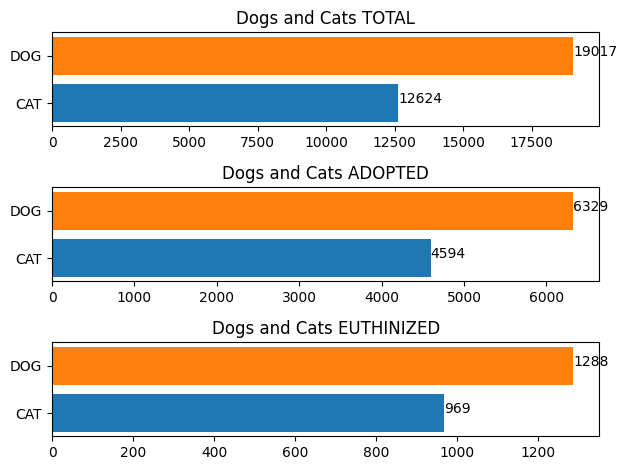

In [ ]:
df2f
# Select only the rows where the outtype is adoption or euthanization
animals_adoption = df2f[df2f['outtype'] == 'ADOPTION']
animals_euth = df2f[df2f['outtype'] == 'EUTH']

# Get the count of animals by animal type
animals_by_type = df2f.groupby('animaltype').size()

# Get the count of animals by animal type that were adopted or euthanized
animals_adopted_by_type = animals_adoption.groupby('animaltype').size()
animals_euth_by_type = animals_euth.groupby('animaltype').size()

# Create a bar chart for the number of animals by animal type, the number of animals adopted by animal type, and the number of animals euthanized by animal type
fig, ax = plt.subplots(3, 1)

for idx, (k, v) in enumerate(animals_by_type.items()):
  ax[0].barh(k, v)
  ax[0].text(v, idx, f'{v}')

ax[0].set_title("Dogs and Cats TOTAL")

for idx, (k, v) in enumerate(animals_adopted_by_type.items()):
  ax[1].barh(k, v)
  ax[1].text(v, idx, f'{v}')
ax[1].set_title("Dogs and Cats ADOPTED")

for idx, (k, v) in enumerate(animals_euth_by_type.items()):
  ax[2].barh(k, v)
  ax[2].text(v, idx, f'{v}')
ax[2].set_title("Dogs and Cats EUTHINIZED")

plt.tight_layout()

#Display Results
cat_ad = (animals_adopted_by_type['CAT'])
cat_eu = (animals_euth_by_type['CAT'])
cat_tot = (animals_by_type['CAT'])
print(f'{(cat_ad / cat_tot) * 100:.2f}% of cats where adopted')
print(f'{(cat_eu / cat_tot) * 100:.2f}% of cats where euthinzied')
print()
dog_ad = (animals_adopted_by_type['DOG'])
dog_tot = (animals_by_type['DOG'])
dog_eu = (animals_euth_by_type['DOG'])
print(f'{(dog_ad / dog_tot)* 100:.2f}% of dogs where adopted')
print(f'{(dog_eu / dog_tot)* 100:.2f}% of dogs where euthinized')

Based on the above graph, aniamls other than Dog, or Cat are negliable, so We will filter them out above.

We also see that more Dogs whent through the shelters than cats
We also see more dogs got adopted then cats

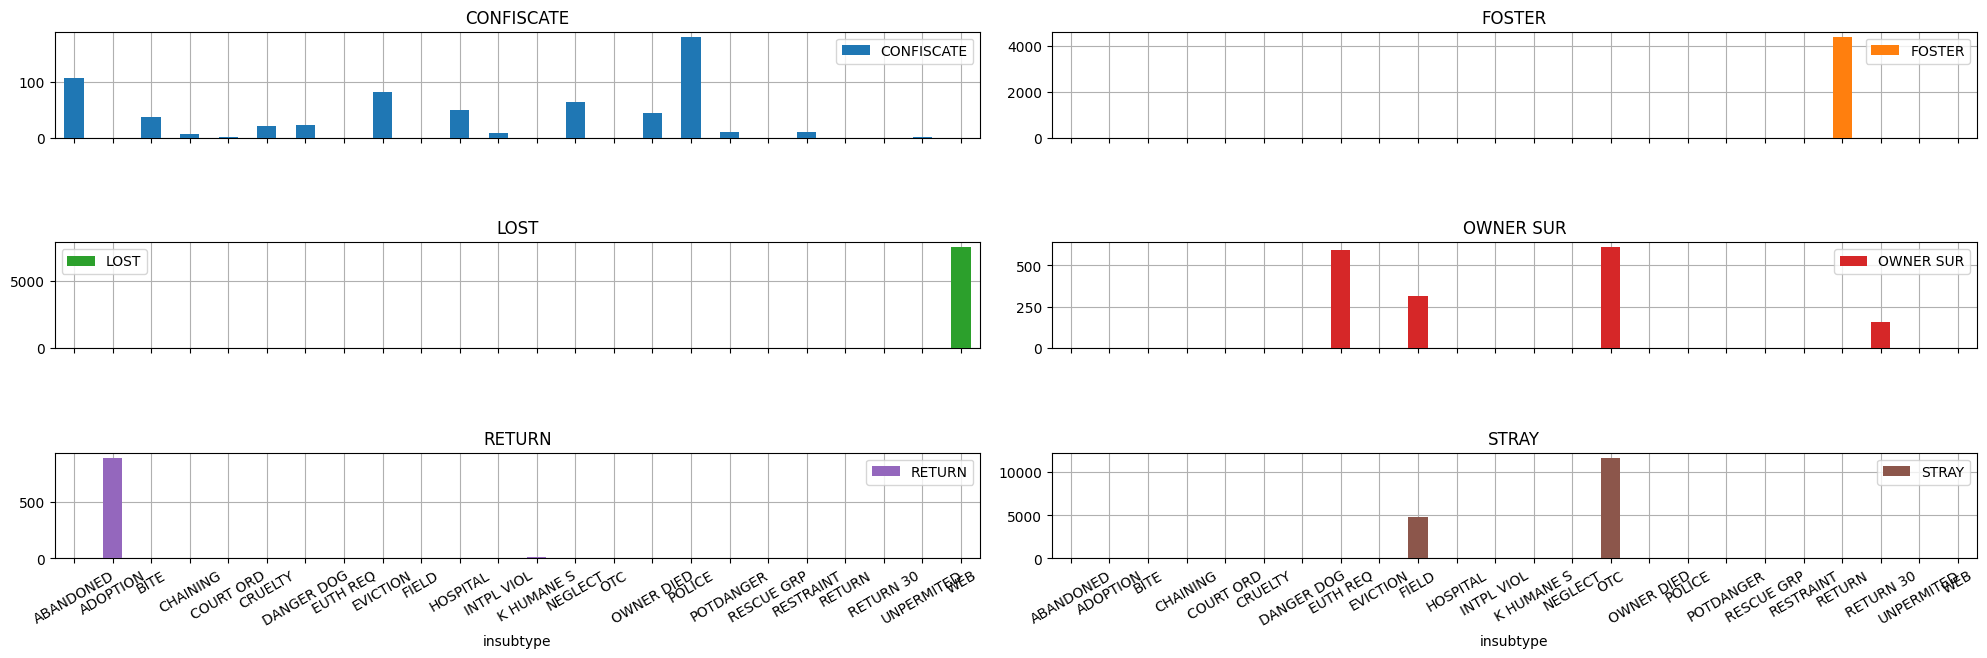

In [ ]:
df2f
animals_by_type = df2f.groupby(['intype', 'insubtype']).size()

# Plot a visualizon of the reasons why The animals were impounded
# Refer to the Key in the text block above to understand what these mean, it is quite a bit
ax = animals_by_type.unstack(level=0).plot(kind='bar', subplots=True, rot=30, figsize=(20, 10), layout=(5, 2), zorder=3)
#  Creater grid lines in all axes so that is it easier to track
for row in ax:
  for x in row:
    x.grid(zorder=0)
    
plt.tight_layout()


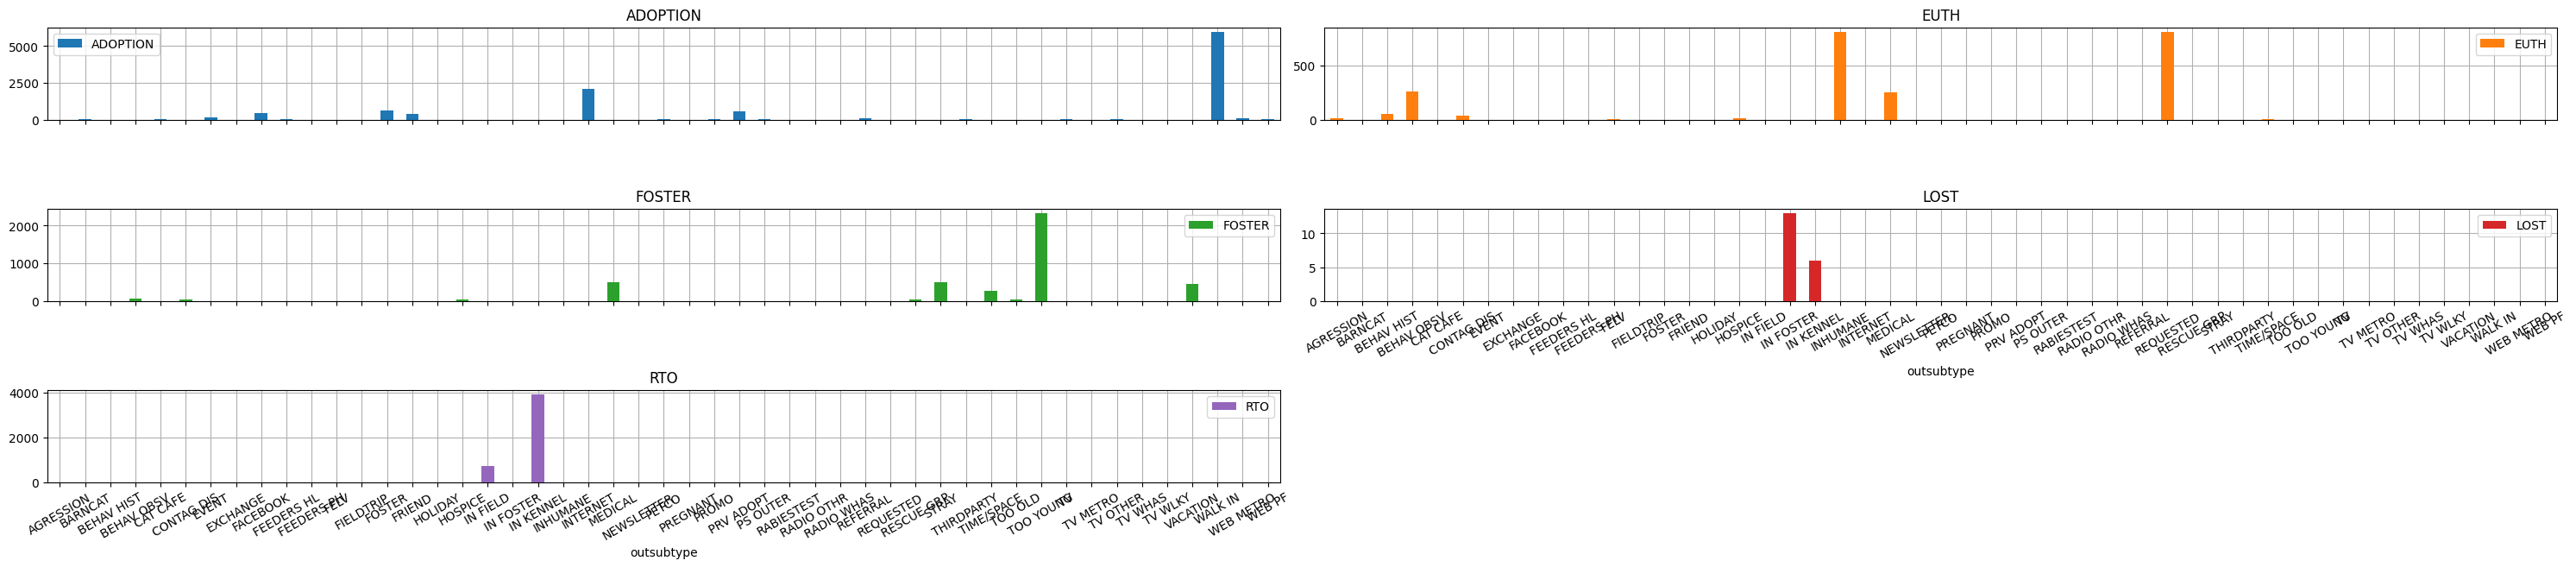

In [ ]:
df2f
animals_by_type2 = df2f.groupby(['outtype', 'outsubtype']).size()

# Plot a visualizon of the reasons why The animals were Released
# Refer to the Key in the text block above to understand what these mean, it is quite a bit
ax = animals_by_type2.unstack(level=0).plot(kind='bar', subplots=True, rot=30, figsize=(30, 10), layout=(5, 2), zorder=3)
#  Creater grid lines in all axes so that is it easier to track
for row in ax:
  for x in row:
    x.grid(zorder=0)
    
plt.tight_layout()


fall 2763
spring 2313
summer 3118
winter 254
The Following Days had increased amounts of adoptions.
Increased amount of adoptions being defined as a day where double the median accored
2019-01-31 with 40 adoptions.
2019-07-09 with 41 adoptions.
2019-07-24 with 42 adoptions.
2019-12-12 with 76 adoptions.
2020-02-13 with 79 adoptions.
2021-07-07 with 64 adoptions.
2021-10-23 with 43 adoptions.
2021-11-19 with 42 adoptions.
2021-12-10 with 64 adoptions.
2022-06-29 with 52 adoptions.
2022-07-14 with 49 adoptions.
2022-07-29 with 57 adoptions.
2022-09-15 with 48 adoptions.
2022-10-15 with 40 adoptions.
2022-10-27 with 41 adoptions.
2022-12-08 with 40 adoptions.


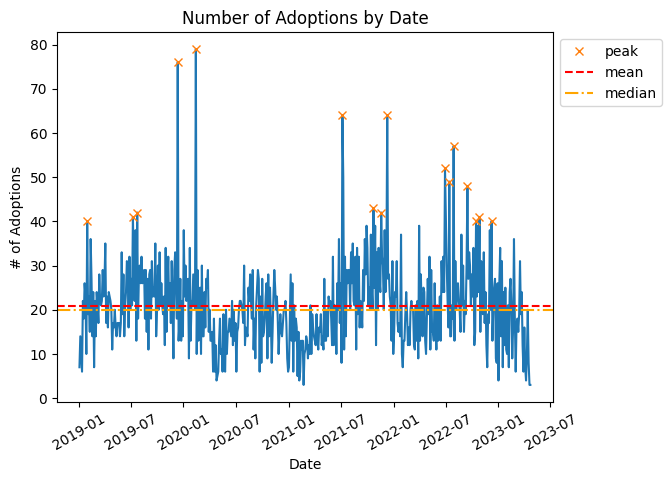

In [16]:
# Get values where outtype is ADOPTION
adopted_df = df2f[df2f['outtype'] == "ADOPTION"]

# Group the pets by the date and season they were adopted
season_df = adopted_df.groupby('inseason').size()
# Print Season Values
for key, value in season_df.items():
  print(key, value)
  
adopted_d = adopted_df.groupby(pd.Grouper(key='outdate',freq='3D')).size()
dates = adopted_d.index

#Create chart of Adoptions over time
fig, ax = plt.subplots()
ax.plot(dates, adopted_d)
ax.tick_params(axis='x', labelrotation=30)

from scipy.signal import find_peaks as fp
# Get the peak adoption days, and plot them
peaks, _ = fp(adopted_d, height=adopted_d.median() * 2)
ax.plot(adopted_d[peaks].index, adopted_d[peaks], "x", label='peak')

#Plot the mean and median of the data
ax.axhline(y=np.nanmean(adopted_d), linestyle="--", c="r", label="mean")
ax.axhline(y=np.nanmedian(adopted_d), linestyle="-.", c="orange", label="median")

plt.legend(bbox_to_anchor=(1.0, 1), loc="upper left")
ax.set_title("Number of Adoptions by Date")
ax.set_ylabel("# of Adoptions")
ax.set_xlabel("Date")

print("The Following Days had increased amounts of adoptions.")
print("Increased amount of adoptions being defined as a day where double the median accored")

# Dipslay peak days
for d, amt in adopted_d[peaks].items():
  print(f"{d.date()} with {amt} adoptions.")


---

Based on these definitions and the graph above

The Season the most pets are adopted is Summer (3118)

The Next is Fall (2763)

So if you where a shelter the best time to advertise your pets would probally be in the summer. 

---

The Following Days had increased amounts of Entries.
Increased amount of entries being defined as a day where double the median accored


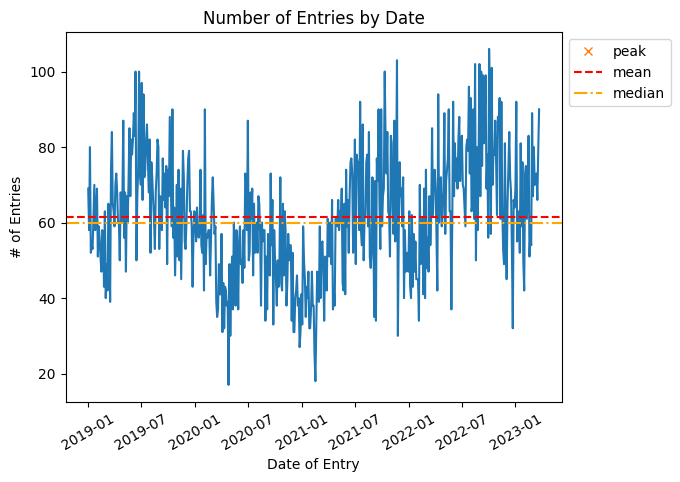

In [ ]:

# Group the pets by the date they entered the system
in_dg = df2f.groupby(pd.Grouper(key='indate',freq='3D')).size()
dates = in_dg.index
# Plot the entry dates
fig, ax = plt.subplots()
ax.plot(dates, in_dg)
ax.tick_params(axis='x', labelrotation=30)

from scipy.signal import find_peaks as fp
# Get the peak dates
peaks, _ = fp(in_dg, height=in_dg.median() * 2)
# Plot the peaks
ax.plot(in_dg[peaks].index, in_dg[peaks], "x", label='peak')
#plot the Mean and Median
ax.axhline(y=np.nanmean(in_dg), linestyle="--", c="r", label="mean")
ax.axhline(y=np.nanmedian(in_dg), linestyle="-.", c="orange", label="median")

plt.legend(bbox_to_anchor=(1.0, 1), loc="upper left")
ax.set_title("Number of Entries by Date")
ax.set_ylabel("# of Entries")
ax.set_xlabel("Date of Entry")

print("The Following Days had increased amounts of Entries.")
print("Increased amount of entries being defined as a day where double the median accored")

#Display Results
for d, amt in in_dg[peaks].items():
  print(f"{d.date()} with {amt} entries.")

Based on the above we can see Entry dates are closer to the median as compared to adoption rates. We can also see, that durng COVID entry rates fell drastically compared to adoption rates who also fell, but not as far it seemed.

So Shelters should exspect ralativly constant amounts of input from all sources

There were 5981 Walk in Adoptions, and 2067 Internet Adoptions = 8048
These made of 77.98449612403101% of all adoptions
Walk ins alone make up 57.95542635658914%
Internet alone make up 20.02906976744186%


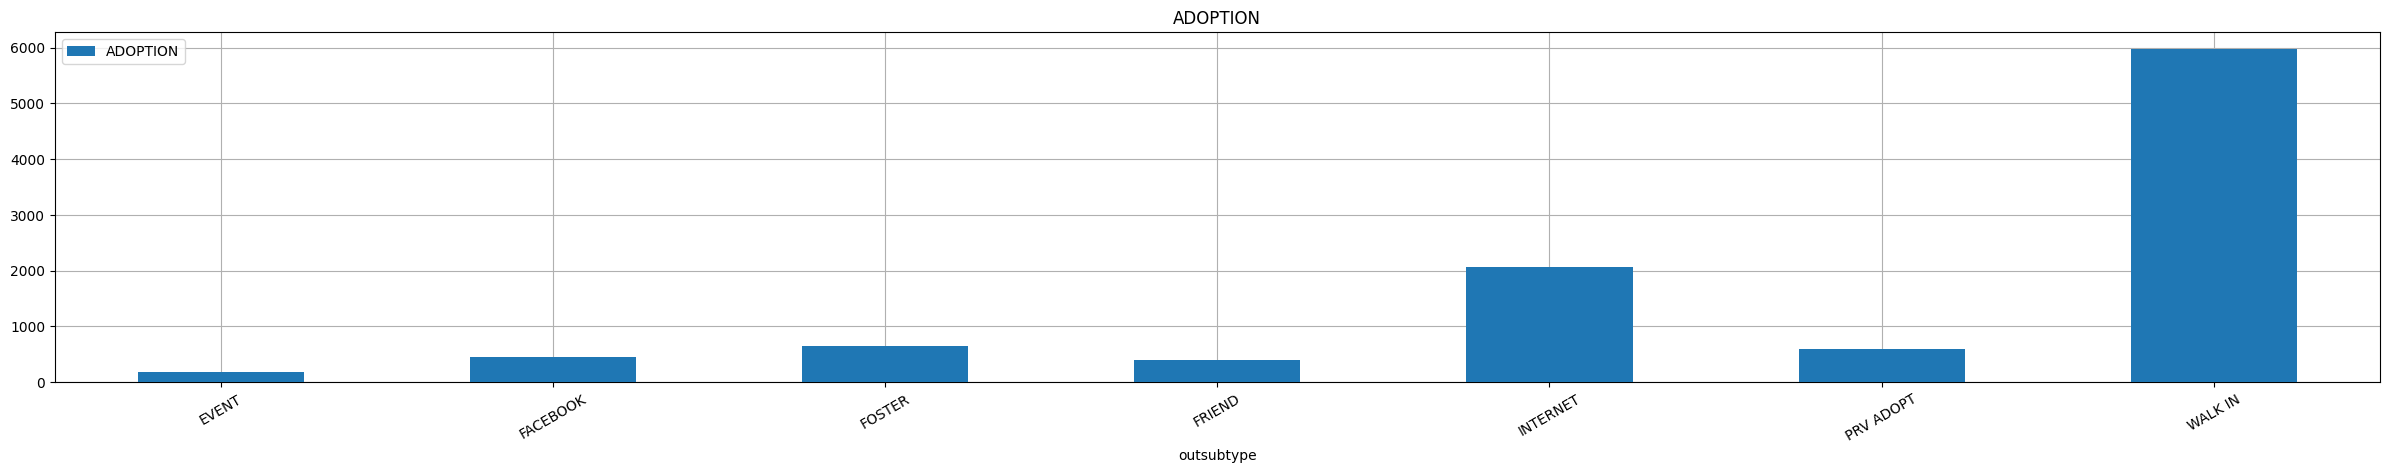

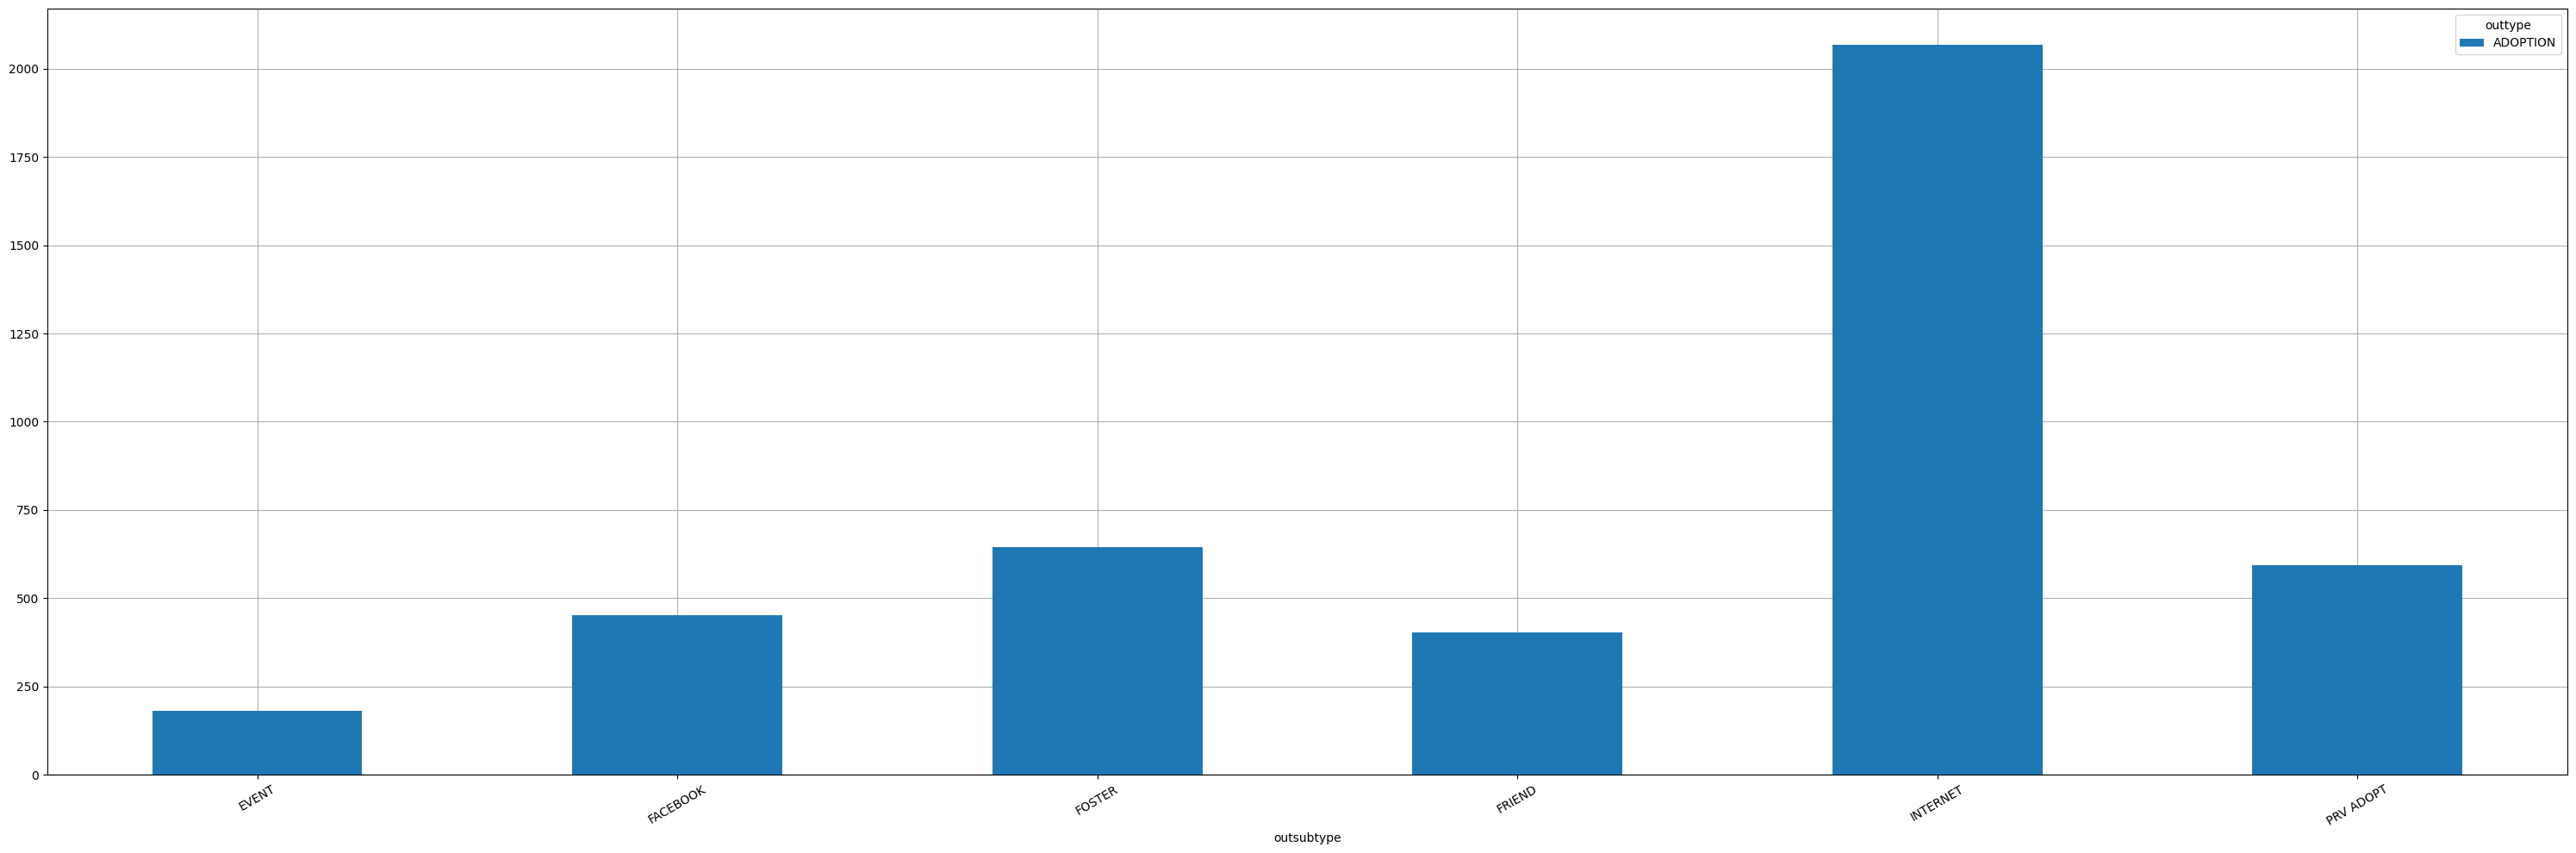

In [8]:
# Filter the DataFrame to only include adoption records
only_adopt = df2f[df2f['outtype'] == "ADOPTION"]

# Define a list of adoption subtypes to include in the analysis and filter by it
adopt_fields = ["EVENT", "FACEBOOK", "FOSTER", "FRIEND", "INTERNET", "PRV ADOPT", "WALK IN"]
only_adopt = only_adopt[only_adopt['outsubtype'].isin(adopt_fields)]

# Remove "WALK IN" adoptions to a another df
only_adopt_no_walk = only_adopt[-only_adopt['outsubtype'].isin(["WALK IN"])]

# Group the DataFrame by adoption type and subtype, and count the number of animals in each group
animals_by_type2 = only_adopt.groupby(['outtype', 'outsubtype']).size()

# Group the DataFrame without "WALK IN" adoptions by adoption type and subtype, and count the number of animals in each group
only_adopt_no_walk_by_type = only_adopt_no_walk.groupby(['outtype', 'outsubtype']).size()

# Get counts of top 2, and total
walk_data = animals_by_type2.loc[("ADOPTION", "WALK IN")]
internet_data = animals_by_type2.loc[("ADOPTION", "INTERNET")]
total_adoptions = animals_by_type2.sum()

#Print Stats
print(f"There were {walk_data} Walk in Adoptions, and {internet_data} Internet Adoptions = {walk_data + internet_data}")
print(f"These made of {(walk_data + internet_data) / total_adoptions * 100}% of all adoptions")
print(f"Walk ins alone make up {(walk_data) / total_adoptions * 100}%")
print(f"Internet alone make up {(internet_data) / total_adoptions * 100}%")

# Plot a visualizon of the how animals were adopted
# Refer to the Key in the text block above to understand what these mean, it is quite a bit
ax = animals_by_type2.unstack(level=0).plot(kind='bar', subplots=True, rot=30, figsize=(30, 10), layout=(2, 1), zorder=3)
ax[1] = only_adopt_no_walk_by_type.unstack(level=0).plot(kind='bar', subplots=False, rot=30, figsize=(30, 10), zorder=3)
#  Creater grid lines in all axes so that is it easier to track
for row in ax:
  for x in row:
    x.grid(zorder=0)
    
plt.tight_layout()


Based on the above graphs w can see most adoptions by far were WALK IN adoptions, and the second most is again by  alarge margin INTERNET adoptions.

Based on this, If you were a shelter or breeder to get the most adopts it would be best to have a good physical location as welll as Internet Presence

The Following Days had increased amounts of adoptions.
Increased amount of adoptions being defined as a day where double the median accored
2019-02-06 with 9 Euthinztions.
2019-02-18 with 9 Euthinztions.
2019-03-20 with 11 Euthinztions.
2019-04-10 with 13 Euthinztions.
2019-04-22 with 13 Euthinztions.
2019-04-28 with 9 Euthinztions.
2019-05-07 with 12 Euthinztions.
2019-05-22 with 9 Euthinztions.
2019-06-03 with 14 Euthinztions.
2019-06-09 with 8 Euthinztions.
2019-06-18 with 10 Euthinztions.
2019-06-27 with 9 Euthinztions.
2019-07-06 with 8 Euthinztions.
2019-07-18 with 16 Euthinztions.
2019-07-30 with 9 Euthinztions.
2019-08-05 with 9 Euthinztions.
2019-08-11 with 9 Euthinztions.
2019-08-26 with 10 Euthinztions.
2019-09-07 with 9 Euthinztions.
2019-10-07 with 10 Euthinztions.
2019-10-16 with 9 Euthinztions.
2019-11-12 with 8 Euthinztions.
2019-11-21 with 9 Euthinztions.
2020-01-29 with 8 Euthinztions.
2020-02-10 with 9 Euthinztions.
2020-02-19 with 9 Euthinztions.
2020-02-25 with 10 

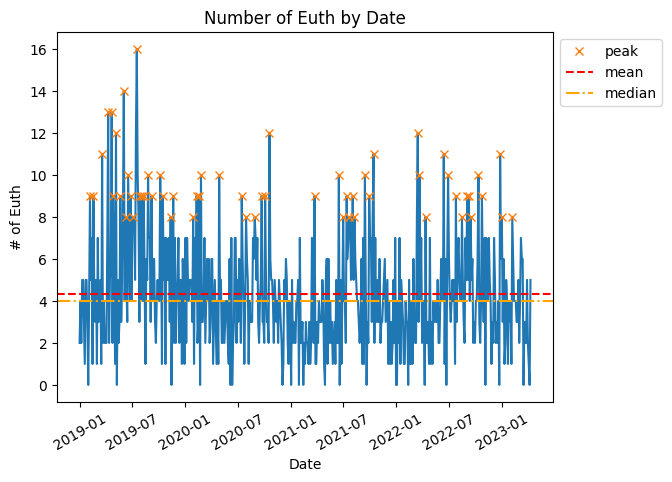

In [ ]:
# Filter the DataFrame to get only rows where the outtype column is "EUTH"
euth_df = df2f[df2f['outtype'] == "EUTH"]

# Group the pets by the date they were euthanized, with a frequency of 3 days
euth_d = euth_df.groupby(pd.Grouper(key='outdate',freq='3D')).size()
dates = euth_d.index

# Plot the euthanization counts over time
fig, ax = plt.subplots()
ax.plot(dates, euth_d)
ax.tick_params(axis='x', labelrotation=30)

from scipy.signal import find_peaks as fp
# Find the peaks in the euthanization counts
peaks, _ = fp(euth_d, height=euth_d.median() * 2)

# Add markers for the peak values to the plot
ax.plot(euth_d[peaks].index, euth_d[peaks], "x", label='peak')

# Plot mean and Median
ax.axhline(y=np.nanmean(euth_d), linestyle="--", c="r", label="mean")
ax.axhline(y=np.nanmedian(euth_d), linestyle="-.", c="orange", label="median")


plt.legend(bbox_to_anchor=(1.0, 1), loc="upper left")
ax.set_title("Number of Euth by Date")
ax.set_ylabel("# of Euth")
ax.set_xlabel("Date")

#Print Results
print("The Following Days had increased amounts of adoptions.")
print("Increased amount of adoptions being defined as a day where double the median accored")

for d, amt in euth_d[peaks].items():
  print(f"{d.date()} with {amt} Euthinztions.")

There were 809 Inhumane caused euth, and 809 requested caused euth = 1618
These made of 71.81535730137595% of all Euth
INHUMANE alone make up 35.90767865068798%
REQUESTED alone make up 35.90767865068798%


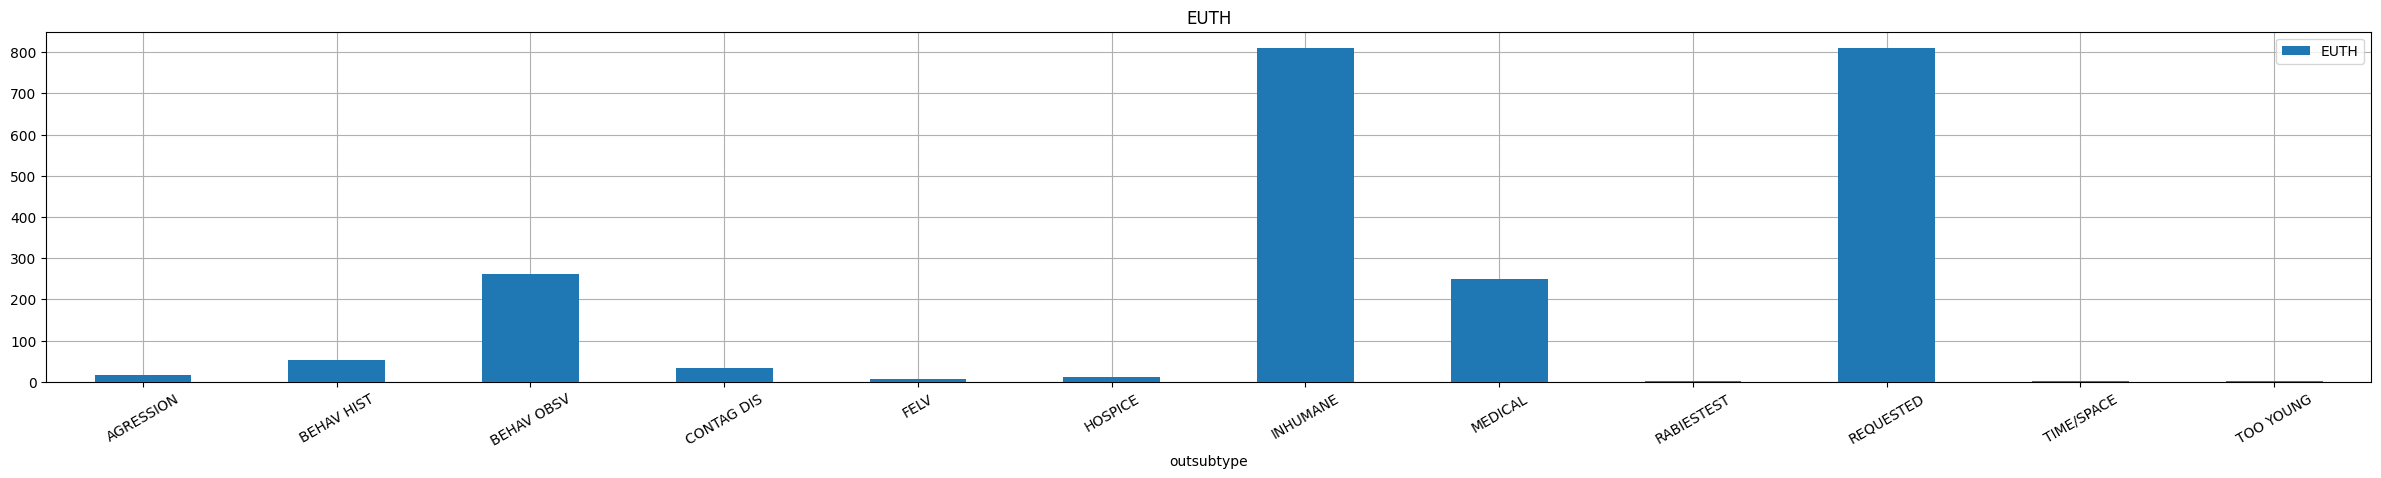

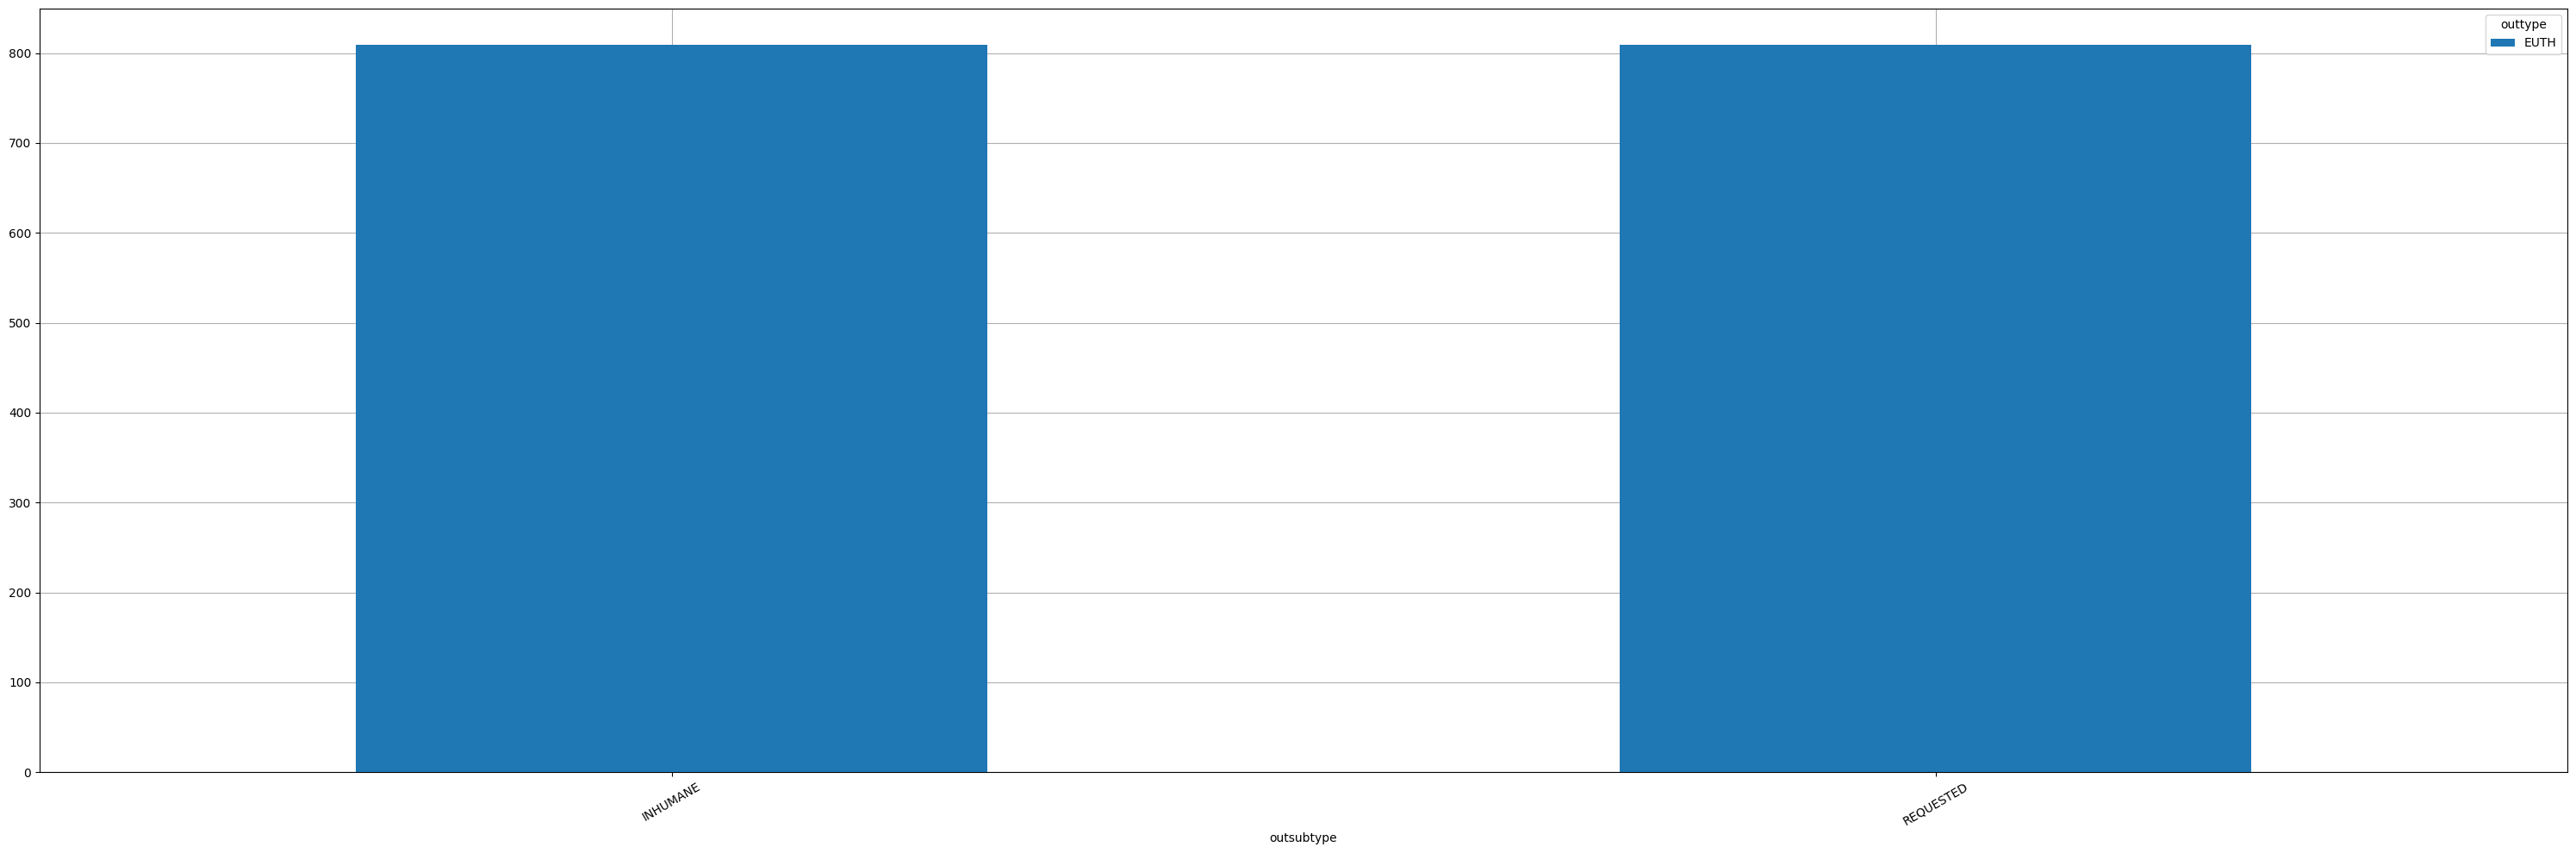

In [11]:
# Filter the DataFrame to get only rows where the outtype column is "EUTH"
only_euth = df2f[df2f['outtype'] == "EUTH"]

#Filter Dataframe keeping only INHUMANE and WALKIN
only_euth_t = df2f[df2f['outsubtype'].isin(["INHUMANE", "REQUESTED"])]

#  Group each by outype and sub outtpe
animals_by_type2e = only_euth.groupby(['outtype', 'outsubtype']).size()
animals_by_type2eg = only_euth_t.groupby(['outtype', 'outsubtype']).size()

#Get counts
walk_data = animals_by_type2e.loc[("EUTH", "INHUMANE")]
internet_data = animals_by_type2e.loc[("EUTH", "REQUESTED")]
total_adoptions = animals_by_type2e.sum()

# Print Results
print(f"There were {walk_data} Inhumane caused euth, and {internet_data} requested caused euth = {walk_data + internet_data}")
print(f"These made of {(walk_data + internet_data) / total_adoptions * 100}% of all Euth")
print(f"INHUMANE alone make up {(walk_data) / total_adoptions * 100}%")
print(f"REQUESTED alone make up {(internet_data) / total_adoptions * 100}%")

# Plot a visualizon of the reasons why The animals were Released
# Refer to the Key in the text block above to understand what these mean, it is quite a bit
ax = animals_by_type2e.unstack(level=0).plot(kind='bar', subplots=True, rot=30, figsize=(30, 10), layout=(2, 1), zorder=3)
ax[1] = animals_by_type2eg.unstack(level=0).plot(kind='bar', subplots=False, rot=30, figsize=(30, 10), zorder=3)
#  Creater grid lines in all axes so that is it easier to track
for row in ax:
  for x in row:
    x.grid(zorder=0)
    
plt.tight_layout()

Based on these graphs above most Euthinations were done by request, or were done because keeping the animal alive was inhumane. These happened at similiar rates